# Flopy Drain Return (DRT) capabilities

In [1]:
import sys
import os
from tempfile import TemporaryDirectory
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# run installed version of flopy or add local path
try:
    import flopy
except:
    fpth = os.path.abspath(os.path.join("..", ".."))
    sys.path.append(fpth)
    import flopy

print(sys.version)
print("numpy version: {}".format(np.__version__))
print("matplotlib version: {}".format(mpl.__version__))
print("flopy version: {}".format(flopy.__version__))

3.11.0 | packaged by conda-forge | (main, Jan 15 2023, 05:44:48) [Clang 14.0.6 ]
numpy version: 1.24.2
matplotlib version: 3.6.3
flopy version: 3.3.7


In [2]:
# temporary directory
temp_dir = TemporaryDirectory()
modelpth = temp_dir.name

# creat the model package
m = flopy.modflow.Modflow(
    "drt_test",
    model_ws=modelpth,
    exe_name="mfnwt",
    version="mfnwt",
)
d = flopy.modflow.ModflowDis(
    m,
    nlay=1,
    nrow=10,
    ncol=10,
    nper=1,
    perlen=1,
    top=10,
    botm=0,
    steady=True,
)
b = flopy.modflow.ModflowBas(m, strt=10, ibound=1)
u = flopy.modflow.ModflowUpw(m, hk=10)
n = flopy.modflow.ModflowNwt(m)
o = flopy.modflow.ModflowOc(m)

In [3]:
# create the drt package
spd = []
for i in range(m.nrow):
    spd.append([0, i, m.ncol - 1, 5.0, 50.0, 1, 1, 1, 1.0])
d = flopy.modflow.ModflowDrt(m, stress_period_data={0: spd})

In [4]:
# run the drt model
m.write_input()
success, buff = m.run_model(silent=True, report=True)
if success:
    for line in buff:
        print(line)
else:
    raise ValueError("Failed to run.")


                                  MODFLOW-NWT-SWR1 
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUNDWATER-FLOW MODEL
                             WITH NEWTON FORMULATION
                             Version 1.2.0 03/01/2020                        
                    BASED ON MODFLOW-2005 Version 1.12.0 02/03/2017                       

                    SWR1 Version 1.04.0 09/15/2016                       

 Using NAME file: drt_test.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2023/05/01 21:55:11

 Solving:  Stress period:     1    Time step:     1    Groundwater-Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2023/05/01 21:55:11
 Elapsed run time:  0.007 Seconds

  Normal termination of simulation


<AxesSubplot: title={'center': 'data Layer 1'}>

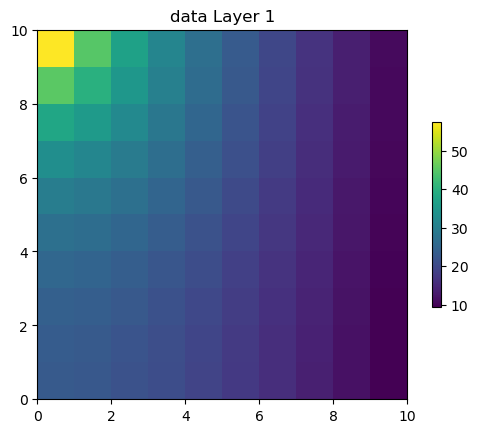

In [5]:
# plot heads for the drt model
hds = flopy.utils.HeadFile(os.path.join(m.model_ws, m.name + ".hds"))
hds.plot(colorbar=True)

In [6]:
# remove the drt package and create a standard drain file
spd = []
for i in range(m.nrow):
    spd.append([0, i, m.ncol - 1, 5.0, 1.0])
m.remove_package("DRT")
d = flopy.modflow.ModflowDrn(m, stress_period_data={0: spd})

In [7]:
# run the drain model
m.write_input()
success, buff = m.run_model(silent=True, report=True)
if success:
    for line in buff:
        print(line)
else:
    raise ValueError("Failed to run.")


                                  MODFLOW-NWT-SWR1 
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUNDWATER-FLOW MODEL
                             WITH NEWTON FORMULATION
                             Version 1.2.0 03/01/2020                        
                    BASED ON MODFLOW-2005 Version 1.12.0 02/03/2017                       

                    SWR1 Version 1.04.0 09/15/2016                       

 Using NAME file: drt_test.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2023/05/01 21:55:12

 Solving:  Stress period:     1    Time step:     1    Groundwater-Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2023/05/01 21:55:12
 Elapsed run time:  0.007 Seconds

  Normal termination of simulation


<AxesSubplot: title={'center': 'data Layer 1'}>

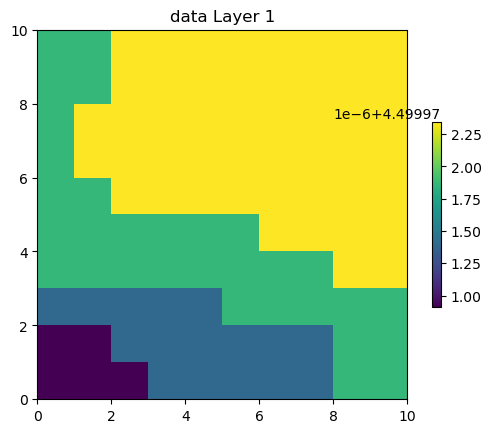

In [8]:
# plot the heads for the model with the drain
hds = flopy.utils.HeadFile(os.path.join(m.model_ws, m.name + ".hds"))
hds.plot(colorbar=True)

In [9]:
try:
    # ignore PermissionError on Windows
    temp_dir.cleanup()
except:
    pass